In [62]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score, precision_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import matplotlib.patches as mpatches
import pickle

In [63]:
df_data= pd.read_csv("../data/adult/adult.csv", delimiter=';')

# Check for Null Data
# df1.head()


In [64]:
df_data.head()

,ID,sex,age,race,marital-status,education,native-country,workclass,occupation,salary-class
0,0,Male,39,White,Never-married,Bachelors,United-States,State-gov,Adm-clerical,<=50K
1,1,Male,50,White,Married-civ-spouse,Bachelors,United-States,Self-emp-not-inc,Exec-managerial,<=50K
2,2,Male,38,White,Divorced,HS-grad,United-States,Private,Handlers-cleaners,<=50K
3,3,Male,53,Black,Married-civ-spouse,11th,United-States,Private,Handlers-cleaners,<=50K
4,4,Female,28,Black,Married-civ-spouse,Bachelors,Cuba,Private,Prof-specialty,<=50K


In [68]:
df_data["native-country"].value_counts().index[0]

'United-States'

In [73]:
col_names = df_data.columns
print(col_names)

Index(['ID', 'sex', 'age', 'race', 'marital-status', 'education',
       'native-country', 'workclass', 'occupation', 'salary-class'],
      dtype='object')


In [70]:
for c in col_names: 
    df_data = df_data.replace("?", np.NaN) 
df_data = df_data.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [74]:
category_col =['workclass', 'education', 'marital-status', 'occupation', 
               'race', 'sex', 'native-country', 'salary-class']  
labelEncoder = preprocessing.LabelEncoder() 
  
mapping_dict ={} 
for col in category_col: 
    df_data[col] = labelEncoder.fit_transform(df_data[col]) 
  
    le_name_mapping = dict(zip(labelEncoder.classes_, 
                        labelEncoder.transform(labelEncoder.classes_))) 
  
    mapping_dict[col]= le_name_mapping 
print(mapping_dict) 

{'workclass': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6}, 'education': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15}, 'marital-status': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6}, 'occupation': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13}, 'race': {'Amer-Indian-Eskimo': 0, 'Asian-Pac-Islander': 1, 'Black': 2, 'Other': 3, 'White': 4}, 'sex': {'Female': 0, 'Male': 1}, 'native-country': {'Cambodia': 0, 'Canada': 1, 'China': 2, 'Columbia': 3, 'Cuba': 4, 'Dominican-Republic': 5, 'Ecuador': 6, 'El-Salvador': 7, 'England': 8, 'France': 9, 'Germany': 10, 'Greece': 11, 'Guatemala': 12, 'Haiti': 13, 'Holand-Netherlands': 14, 'Honduras': 15, 'Hong': 16, 'Hungary': 17, 'India': 18, 'Iran': 19, 'Ireland': 20, 'Italy': 21, 'Jamaica': 22, 'Japan': 23, 'Laos': 24, 'Mexico': 25, 'Nicaragua': 26, 'Outlying-US(Guam-USVI-etc)': 27, 'Peru': 28, 'Philippines': 29, 'Poland': 30, 'Portugal': 31, 'Pue

In [78]:
Y = df_data['salary-class']
X = df_data.drop('salary-class', axis = 1) 

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100) 

In [80]:
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X.values)

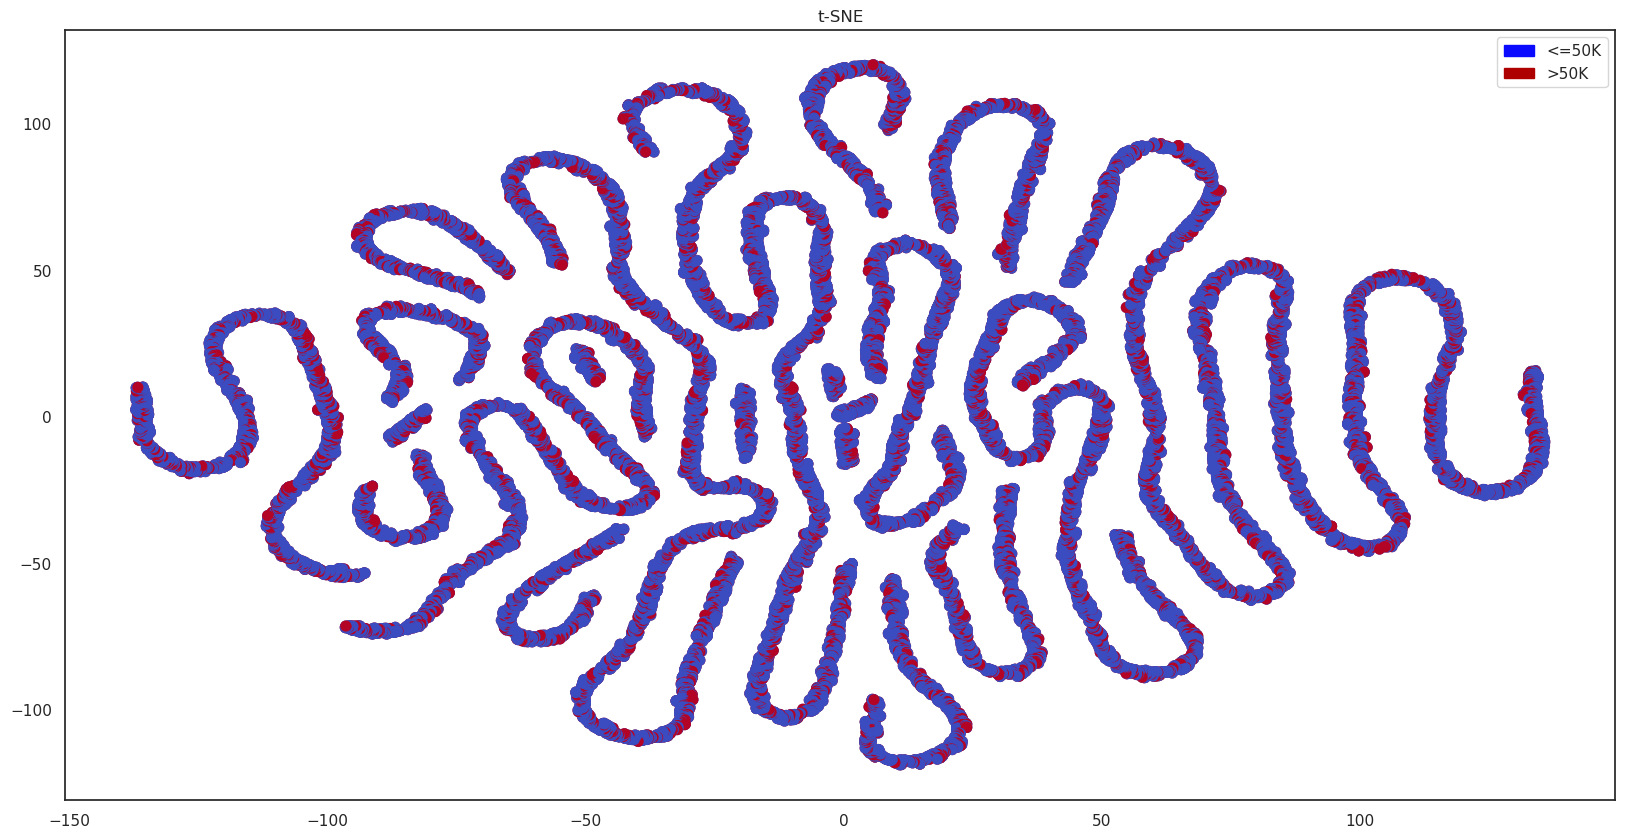

In [81]:
blue_patch = mpatches.Patch(color='#0A0AFF', label='<=50K')
red_patch = mpatches.Patch(color='#AF0000', label='>50K')
plt.figure(figsize=(20,10))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=(Y == 0), cmap='coolwarm', label='<=50K', linewidths=2)
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=(Y == 1), cmap='coolwarm', label='>50K', linewidths=2)
plt.title('t-SNE')
plt.legend(handles=[blue_patch, red_patch])

In [82]:
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
ypred = rf.predict(X_test)
print(confusion_matrix(y_test, ypred))
print(classification_report(y_test, ypred))
print("Accuracy Score:", accuracy_score(y_test, ypred))
print("Recall Score:", recall_score(y_test, ypred))
print("Precision Score:", precision_score(y_test, ypred))
print("ROC AUC Score: ", roc_auc_score(y_test, ypred))
rf_fp, rf_tp, rf_threshold = roc_curve(y_test, ypred)
print("Threshold:", rf_threshold)

[[6071  680]
 [1043 1255]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      6751
           1       0.65      0.55      0.59      2298

    accuracy                           0.81      9049
   macro avg       0.75      0.72      0.73      9049
weighted avg       0.80      0.81      0.80      9049

Accuracy Score: 0.8095922201348216
Recall Score: 0.5461270670147955
Precision Score: 0.648578811369509
ROC AUC Score:  0.7227006243087605
Threshold: [inf  1.  0.]


In [83]:
gbc = GradientBoostingClassifier(n_estimators=100, random_state=0)
gbc.fit(X_train, y_train)
ypred = gbc.predict(X_test)
print(confusion_matrix(y_test, ypred))
print(classification_report(y_test, ypred))
print("Accuracy Score:", accuracy_score(y_test, ypred))
print("Recall Score:", recall_score(y_test, ypred))
print("Precision Score:", precision_score(y_test, ypred))
print("ROC AUC Score: ", roc_auc_score(y_test, ypred))
gbc_fp, gbc_tp, gbc_threshold = roc_curve(y_test, ypred)
print("Threshold:", gbc_threshold)

[[6217  534]
 [ 994 1304]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      6751
           1       0.71      0.57      0.63      2298

    accuracy                           0.83      9049
   macro avg       0.79      0.74      0.76      9049
weighted avg       0.82      0.83      0.82      9049

Accuracy Score: 0.8311415626036026
Recall Score: 0.5674499564838991
Precision Score: 0.7094668117519043
ROC AUC Score:  0.7441752819006667
Threshold: [inf  1.  0.]


In [84]:
abc = AdaBoostClassifier(n_estimators=100, random_state=0)
abc.fit(X_train, y_train)
ypred = abc.predict(X_test)
print(confusion_matrix(y_test, ypred))
print(classification_report(y_test, ypred))
print("Accuracy Score:", accuracy_score(y_test, ypred))
print("Recall Score:", recall_score(y_test, ypred))
print("Precision Score:", precision_score(y_test, ypred))
print("ROC AUC Score: ", roc_auc_score(y_test, ypred))
abc_fp, abc_tp, abc_threshold = roc_curve(y_test, ypred)
print("Threshold:", abc_threshold)

[[6178  573]
 [1021 1277]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      6751
           1       0.69      0.56      0.62      2298

    accuracy                           0.82      9049
   macro avg       0.77      0.74      0.75      9049
weighted avg       0.82      0.82      0.82      9049

Accuracy Score: 0.8238479389987844
Recall Score: 0.5557006092254134
Precision Score: 0.6902702702702703
ROC AUC Score:  0.7354121473026787
Threshold: [inf  1.  0.]


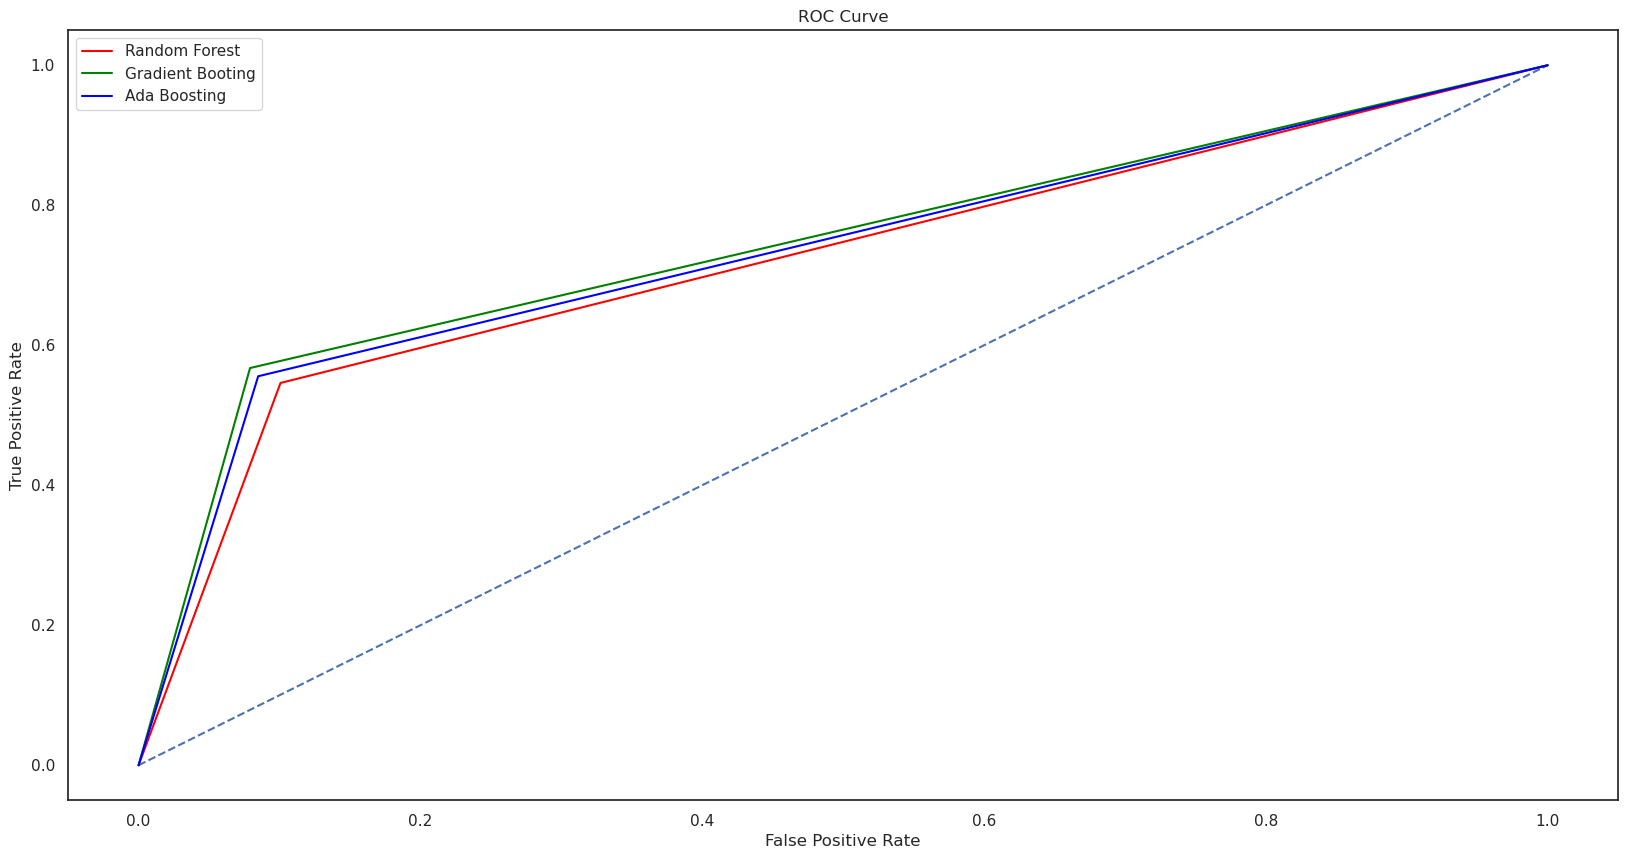

In [85]:
plt.figure(figsize=(20,10))
plt.plot([0, 1], [0, 1], linestyle = "--")
plt.plot(rf_fp, rf_tp, color="red", label = "Random Forest")
plt.plot(gbc_fp, gbc_tp, color="green", label = "Gradient Booting")
plt.plot(abc_fp, abc_tp, color="blue", label = "Ada Boosting")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

In [86]:
feature_importance_df = pd.DataFrame(X_train.columns, columns=["Feature"])
feature_importance_df["Importance"] = rf.feature_importances_
feature_importance_df.sort_values('Importance', ascending=False, inplace=True)
feature_importance_df = feature_importance_df.head(20)
feature_importance_df

,Feature,Importance
0,ID,0.284238
2,age,0.212207
4,marital-status,0.163436
5,education,0.113917
8,occupation,0.106873
7,workclass,0.051085
1,sex,0.030232
6,native-country,0.020146
3,race,0.017867


Text(0.5, 1.0, 'Plot Feature Importances')

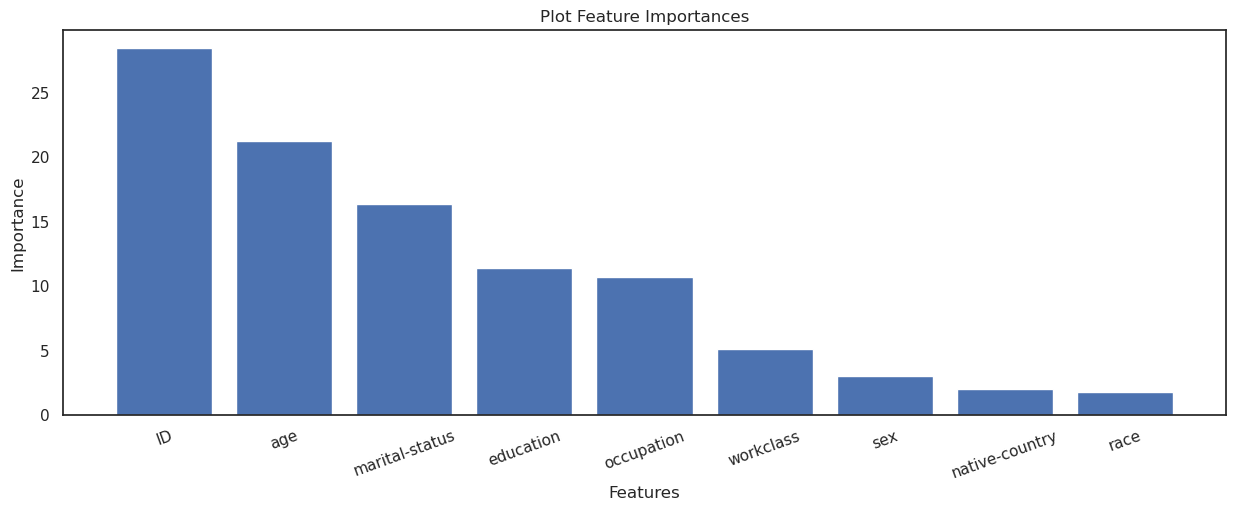

In [87]:
plt.figure(figsize=(15,5))
ax = feature_importance_df['Feature']
plt.bar(range(feature_importance_df.shape[0]), feature_importance_df['Importance']*100)
plt.xticks(range(feature_importance_df.shape[0]), feature_importance_df['Feature'], rotation = 20)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Plot Feature Importances")